In [1]:
using Pkg
Pkg.activate(".")
using RidePooling
RP = RidePooling
using RidePooling_eval
EV = RidePooling_eval
using Plots
using LaTeXStrings

  Activating project at `~/ridepooling_simulations`


In [2]:
name = "./Playing field/drive_and_wait/anywt1.model"


"./Playing field/drive_and_wait/anywt1.model"

LoadError: UndefVarError: model not defined

In [4]:
Δ = 0.1
A = 0
B = 1
bins = A:Δ:B
print()

In [5]:
path = "./Playing field/"
rejections = ["anywt1", "anywt035"]
dt_types = ["resubmission", "drive_and_wait"]
colors = [:darkred, :blue, :orange, :darkgreen, :brown]
paretoParams = [:served, :delay]
nomen = Dict(["resubmission"=>"resub",
        "drive_and_wait"=> "d&w",
        "anywt1"=> L"t_{wait} = 1",
        "anywt035"=> L"t_{wait} = 0.35",
        :served => "served percentage " * L"p_{served}",
        :total_time => "Total time " * L"t_{total}" ])

Dict{Any, AbstractString} with 6 entries:
  "anywt035"       => L"$t_{wait} = 0.35$"
  "resubmission"   => "resub"
  "anywt1"         => L"$t_{wait} = 1$"
  :total_time      => "Total time \$t_{total}\$"
  :served          => "served percentage \$p_{served}\$"
  "drive_and_wait" => "d&w"

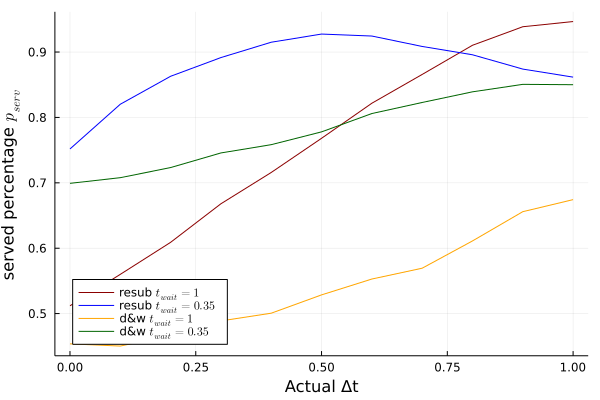

Your GR installation is incomplete. Rerunning build step for GR package.


┌ Error: Error importing GR_jll:
│   err = InitError(:Qt5Base_jll, ErrorException("could not load library \"/home/rhaag/.julia/artifacts/988066cc974e30c89774b0c471f47201975a4423/lib/libQt5Concurrent.so\"\n/home/rhaag/.julia/conda/3/lib/python3.9/site-packages/PyQt5/../../../libQt5Core.so.5: version `Qt_5.15' not found (required by /home/rhaag/.julia/artifacts/988066cc974e30c89774b0c471f47201975a4423/lib/libQt5Concurrent.so)"))
└ @ GR /home/rhaag/.julia/packages/GR/SOvTP/src/funcptrs.jl:42
┌ Info: Switching provider to GR due to error in depsfile
│   depsfile = /home/rhaag/.julia/packages/GR/SOvTP/deps/deps.jl
└ @ GR /home/rhaag/.julia/packages/GR/SOvTP/src/GR.jl:355
┌ Info: Emptying depsfile. GR provider is GR
│   provider = GR
│   depsfile = /home/rhaag/.julia/packages/GR/SOvTP/deps/deps.jl
└ @ GR.Builder /home/rhaag/.julia/packages/GR/SOvTP/deps/build.jl:128
┌ Info: Downloading pre-compiled GR 0.62.0 Ubuntu binary
└ @ GR.Builder /home/rhaag/.julia/packages/GR/SOvTP/deps/build.jl:193


In [6]:
plot()
c = 1
for dt_type in dt_types
    for re in rejections
        name = path *"/" *dt_type*"/" *re *".model"
        request_bins = [[] for bin in bins]
        model = RP.loadmodel(name)
        
        requests = model.requests
        for req in requests
            dt = req.dt_earliest_pickup
            
            i = trunc(Int, dt/Δ) +1
            if i <= length(request_bins)
                push!(request_bins[i], req)
            end
        end
        y = [mean(:served, reqs) for reqs in request_bins]
        label = nomen[dt_type] * " " * nomen[re]
        plot!(bins, y, color=colors[c], label=label, legend=:bottomleft)
        
        c += 1
    end
end
xlabel!("Actual Δt")
ylabel!("served percentage " * L"p_{serv}")


In [7]:
savefig("pserv_act_dt.png")

In [8]:
name = "Playing field/resubmission/standart.model"
model = RP.loadmodel(name)
mean(:served, model)


0.00081